# Data wrangling

Process of data cleaning:

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
path = "craigslistVehicles.csv"
dfcars = pd.read_csv(path)
dfcars.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,lat,long
0,https://tricities.craigslist.org/cto/d/1978-br...,tricities,5000,1978.0,ford,bronco,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00r0r_eGnnFC1JNm...,37.132840,-95.785580
1,https://tricities.craigslist.org/cto/d/2008-bu...,tricities,5000,2008.0,buick,lucerne cxl v6,like new,6 cylinders,gas,51000.0,clean,automatic,NaN,fwd,full-size,sedan,grey,https://images.craigslist.org/00N0N_1LSHqLESW9...,35.777999,-83.612533
2,https://tricities.craigslist.org/cto/d/2006-po...,tricities,13500,2006.0,NaN,Pont GTO,excellent,8 cylinders,gas,93000.0,clean,automatic,NaN,rwd,mid-size,coupe,red,https://images.craigslist.org/00Y0Y_4cbEgS4prY...,36.333900,-82.340800
3,https://tricities.craigslist.org/cto/d/2006-me...,tricities,6200,2006.0,mercedes-benz,NaN,NaN,NaN,gas,NaN,rebuilt,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00T0T_fGLx4Ltazq...,36.000092,-84.018302
4,https://tricities.craigslist.org/cto/d/2016-fo...,tricities,37900,2016.0,ford,f350,excellent,8 cylinders,diesel,70500.0,clean,automatic,NaN,4wd,NaN,truck,white,https://images.craigslist.org/00k0k_ls78o6lwVq...,36.272932,-82.537537


Removing unneccesary columns:

In [3]:
dfcars = dfcars.drop(['url', 'city', 'VIN', 'image_url'], axis=1)

In [4]:
dfcars.groupby(['manufacturer']).size().sort_values(ascending=False)

manufacturer
ford               116051
chevrolet          103722
toyota              45266
honda               34698
nissan              31358
dodge               30337
jeep                29796
gmc                 28033
ram                 22908
bmw                 16593
volkswagen          15290
hyundai             13444
chrysler            12322
mercedes-benz       12117
subaru              11523
cadillac             9963
kia                  9766
mazda                9132
buick                9006
pontiac              8590
lexus                7711
acura                6880
audi                 5870
lincoln              5060
infiniti             4657
volvo                4450
mitsubishi           4187
mercury              3993
saturn               3479
mini                 2450
rover                2135
jaguar               1694
fiat                  823
harley-davidson       371
datsun                211
ferrari               103
alfa-romeo             91
porche                 49

We choose two the most frequently occuring manufacturers: ford and chevrolet.

In [5]:
dfcars = dfcars.loc[(dfcars['manufacturer'] == 'ford') | (dfcars['manufacturer'] == 'chevrolet')]
dfcars.isna().sum()

price                0
year                 0
manufacturer         0
make             10059
condition        91842
cylinders        88199
fuel              2448
odometer         76313
title_status      1077
transmission      1610
drive            79850
size            142186
type             89548
paint_color      88116
lat               1974
long              1974
dtype: int64

In [6]:
print(dfcars.shape)

(219773, 16)


In [7]:
dfcars = dfcars.rename(index=str, columns={"size": "car_size", "type": "car_type"})

In [8]:
dfcars = dfcars.dropna(subset=['make'])
dfcars = dfcars.dropna(thresh=10) #Keep only the rows with at least 10 non-NA values. To discuss
print(dfcars.shape)

(176506, 16)


In [9]:
dfcars.head()

,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,car_size,car_type,paint_color,lat,long
4,37900,2016.0,ford,f350,excellent,8 cylinders,diesel,70500.0,clean,automatic,4wd,NaN,truck,white,36.272932,-82.537537
7,5000,2003.0,chevrolet,silverado,like new,8 cylinders,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,36.344500,-82.201500
9,5950,2003.0,ford,expedition,excellent,8 cylinders,gas,141602.0,clean,automatic,4wd,full-size,SUV,green,37.286501,-80.056719
10,8950,2007.0,chevrolet,avalanche,excellent,8 cylinders,gas,205932.0,clean,automatic,rwd,full-size,SUV,black,37.286501,-80.056719
11,11950,2007.0,ford,f-150,excellent,8 cylinders,gas,77533.0,clean,automatic,4wd,full-size,truck,black,37.286501,-80.056719


In [10]:
dfcars.dtypes

price             int64
year            float64
manufacturer     object
make             object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
car_size         object
car_type         object
paint_color      object
lat             float64
long            float64
dtype: object

Column 'make' shows that many observations have mixed names for the same car model and require cleaning. What's more, we decide to limit values of 'make' to be greater than or equal to 100 - we want to use those car models, which are popular and  have at least 100 different offers.

In [11]:
print(dfcars.make.value_counts())

f-150                        7879
silverado 1500               5895
mustang                      4038
silverado                    3598
escape                       3309
explorer                     3201
f150                         2968
tahoe                        2949
f250                         2911
impala                       2807
1500 silverado               2658
focus                        2642
fusion                       2390
corvette                     2387
camaro                       2363
malibu                       2303
equinox                      2176
ranger                       2122
f-250                        2025
f350                         1901
cruze                        1775
1500                         1767
suburban                     1725
edge                         1660
silverado 2500hd             1601
expedition                   1593
taurus                       1499
f150 4x4                     1427
f-350                        1423
traverse      

In [12]:
dfcars['count'] = dfcars.groupby('make')['make'].transform('count')
dfcars = dfcars.loc[(dfcars['count'] >= 100)] # limiting car models to have at least 100 offers
del dfcars['count']
print(dfcars.shape)

(137830, 16)


In [13]:
print(dfcars.make.value_counts())

f-150                       7879
silverado 1500              5895
mustang                     4038
silverado                   3598
escape                      3309
explorer                    3201
f150                        2968
tahoe                       2949
f250                        2911
impala                      2807
1500 silverado              2658
focus                       2642
fusion                      2390
corvette                    2387
camaro                      2363
malibu                      2303
equinox                     2176
ranger                      2122
f-250                       2025
f350                        1901
cruze                       1775
1500                        1767
suburban                    1725
edge                        1660
silverado 2500hd            1601
expedition                  1593
taurus                      1499
f150 4x4                    1427
f-350                       1423
traverse                    1241
          

In [14]:
dfcars.loc[dfcars.make == "1500 silverado", "make"] = "silverado 1500"
dfcars.loc[dfcars.make == "2500 silverado", "make"] = "silverado 2500"

for i in ["f 150", "f-150", "f - 150", "f -150", "f- 150"]:
    dfcars.loc[dfcars.make == i, "make"] = "f150"
    
dfcars.loc[dfcars.make == "f-150 lariat", "make"] = "f150 lariat"
dfcars.loc[dfcars.make == "f-150 xl", "make"] = "f150 xl"
dfcars.loc[dfcars.make == "f-150 xlt", "make"] = "f150 xlt"

for i in ["f-150 4 x 4", "f-150 4x4", "f-150 4 x4"]:
    dfcars.loc[dfcars.make == i, "make"] = "f150 4x4"

for i in ["f 250", "f-250", "f - 250", "f -250", "f- 250"]:
    dfcars.loc[dfcars.make == i, "make"] = "f250"
    
for i in ["f 350", "f-350", "f - 350", "f -350", "f- 350"]:
    dfcars.loc[dfcars.make == i, "make"] = "f350"

dfcars.loc[dfcars.make == "f-450", "make"] = "f450"
dfcars.loc[dfcars.make == "f-550", "make"] = "f550"
dfcars.loc[dfcars.make == "s-10", "make"] = "s10"

dfcars.loc[dfcars.make == "f-150 fx4", "make"] = "f150 fx4"

dfcars.loc[dfcars.make == "2500 hd", "make"] = "2500hd"

for i in ["f-250 super duty", "super duty f-250", "f-250 sd", "f-250sd", "f250 super duty"]:
    dfcars.loc[dfcars.make == i, "make"] = "f250 sd"

for i in ["f-350 sd", "f-350sd", "f-350 super duty", "f350 super duty"]:
    dfcars.loc[dfcars.make == i, "make"] = "f350 sd"

dfcars.loc[dfcars.make == "e-350", "make"] = "e350"
dfcars.loc[dfcars.make == "e-450", "make"] = "e450"

dfcars.loc[dfcars.make == "super duty f-350 drw", "make"] = "f350 sd drw"
dfcars.loc[dfcars.make == "super duty f-350 srw", "make"] = "f350 sd srw"
dfcars.loc[dfcars.make == "super duty f250 srw", "make"] = "f250 sd srw"
dfcars.loc[dfcars.make == "super duty f-250 srw", "make"] = "f250 sd srw"

In [15]:
print(dfcars.make.value_counts())

f150                        11263
silverado 1500               8553
f250                         5069
mustang                      4038
silverado                    3598
f350                         3465
escape                       3309
explorer                     3201
tahoe                        2949
impala                       2807
focus                        2642
fusion                       2390
corvette                     2387
camaro                       2363
f250 sd                      2342
malibu                       2303
equinox                      2176
ranger                       2122
cruze                        1775
1500                         1767
f150 xlt                     1727
suburban                     1725
edge                         1660
silverado 2500hd             1601
expedition                   1593
f150 4x4                     1534
taurus                       1499
traverse                     1241
mustang gt                   1208
focus se      

We encode all variables to numeric categories:

In [16]:
print(dfcars.condition.value_counts())

excellent    40702
good         37365
like new      8828
fair          7826
new            655
salvage        510
Name: condition, dtype: int64


In [17]:
condDict = {'new':5, 'like new':4, 'excellent':3, 'good':2,'fair':1, 'salvage':0}
dfcars["condition"]=dfcars.condition.map(condDict)
print(dfcars.condition.value_counts())

3.0    40702
2.0    37365
4.0     8828
1.0     7826
5.0      655
0.0      510
Name: condition, dtype: int64


In [18]:
print(dfcars.cylinders.value_counts())

8 cylinders     50060
6 cylinders     27705
4 cylinders     17192
other            3963
10 cylinders     1032
5 cylinders       459
3 cylinders        56
12 cylinders        8
Name: cylinders, dtype: int64


In [19]:
dfcars['cylinders'].isna().sum()

37355

In [20]:
# #Zamiana other na 0 -> potem można jakoś MLowo wyznaczyć liczbę cylindrów gdy jest 0. 
# #Czy zamienić na coś 'missing'? Wtedy możnaby zamienić kolumnę na int
# dfcars['cylinders'].loc[(dfcars['cylinders'] == 'other')] = 0
# dfcars['cylinders'] = dfcars['cylinders'].str.extract('(\d+)') #.astype(int).head()
# dfcars['cylinders'] = dfcars['cylinders'].fillna('missing')

In [21]:
print(dfcars.manufacturer.value_counts())

ford         73473
chevrolet    64357
Name: manufacturer, dtype: int64


In [22]:
manDict = {'ford':1, 'chevrolet':0}
dfcars["manufacturer"]=dfcars.manufacturer.map(manDict)
print(dfcars.manufacturer.value_counts())

1    73473
0    64357
Name: manufacturer, dtype: int64


In [23]:
print(dfcars.fuel.value_counts())

gas         120075
diesel       12388
other         4500
hybrid         386
electric        49
Name: fuel, dtype: int64


In [24]:
dfcars.fuel.isna().sum()

432

In [25]:
fuelDict = {'gas':3, 'diesel':2, 'other':1, 'hybrid':0, 'electric':0}
dfcars["fuel"]=dfcars.fuel.map(fuelDict)
print(dfcars.fuel.value_counts())

3.0    120075
2.0     12388
1.0      4500
0.0       435
Name: fuel, dtype: int64


In [26]:
print(dfcars.title_status.value_counts())

clean         129428
rebuilt         3474
lien            2139
salvage         1942
missing          558
parts only       225
Name: title_status, dtype: int64


In [27]:
dfcars.title_status.isna().sum()

64

We remove "parts only" - we are interested in modeling price of cars, not parts of cars.

In [28]:
dfcars = dfcars[dfcars.title_status != "parts only"]

In [29]:
print(dfcars.title_status.value_counts())

clean      129428
rebuilt      3474
lien         2139
salvage      1942
missing       558
Name: title_status, dtype: int64


In [30]:
titleDict = {'clean':4, 'rebuilt':3, 'lien':2, 'salvage':1, 'missing':0}
dfcars["title_status"]=dfcars.title_status.map(titleDict)
print(dfcars.title_status.value_counts())

4.0    129428
3.0      3474
2.0      2139
1.0      1942
0.0       558
Name: title_status, dtype: int64


In [31]:
print(dfcars.transmission.value_counts())

automatic    123898
manual        11416
other          1757
Name: transmission, dtype: int64


In [32]:
dfcars.transmission.isna().sum()

534

In [33]:
transDict = {'automatic':2, 'manual':1, 'other':0}
dfcars["transmission"]=dfcars.transmission.map(transDict)
print(dfcars.transmission.value_counts())

2.0    123898
1.0     11416
0.0      1757
Name: transmission, dtype: int64


In [34]:
print(dfcars.drive.value_counts())

4wd    50792
rwd    28871
fwd    25790
Name: drive, dtype: int64


In [35]:
dfcars.drive.isna().sum()

32152

In [36]:
driveDict = {'4wd':2, 'rwd':1, 'fwd':0}
dfcars["drive"]=dfcars.drive.map(driveDict)
print(dfcars.drive.value_counts())

2.0    50792
1.0    28871
0.0    25790
Name: drive, dtype: int64


In [37]:
print(dfcars.car_size.value_counts())

full-size      38699
mid-size       13479
compact         5626
sub-compact      972
Name: car_size, dtype: int64


In [38]:
dfcars.car_size.isna().sum()

78829

In [39]:
sizeDict = {'full-size':3, 'mid-size':2, 'compact':1, 'sub-compact':0}
dfcars["car_size"]=dfcars.car_size.map(sizeDict)
print(dfcars.car_size.value_counts())

3.0    38699
2.0    13479
1.0     5626
0.0      972
Name: car_size, dtype: int64


In [40]:
print(dfcars.car_type.value_counts())

SUV            21912
truck          21583
pickup         20567
sedan          16119
coupe           7444
van             2743
convertible     2190
hatchback       1892
other           1466
mini-van         711
wagon            676
bus              202
offroad          199
Name: car_type, dtype: int64


In [41]:
dfcars.car_type.isna().sum()

39901

In [42]:
typeDict = {'truck':12, 'pickup':11, 'SUV':10, 'sedan':9, 'coupe':8, 'van':7, 'convertible':6, 
    'hatchback':5, 'other':4, 'wagon':3, 'mini-van':2, 'bus':1, 'offroad':0}
dfcars["car_type"]=dfcars.car_type.map(typeDict)
print(dfcars.car_type.value_counts())

10.0    21912
12.0    21583
11.0    20567
9.0     16119
8.0      7444
7.0      2743
6.0      2190
5.0      1892
4.0      1466
2.0       711
3.0       676
1.0       202
0.0       199
Name: car_type, dtype: int64


In [43]:
print(dfcars.paint_color.value_counts())

white     26560
black     17788
red       13123
silver    11031
blue      11016
grey       7810
green      4194
brown      2766
custom     2410
yellow     1123
orange      672
purple      320
Name: paint_color, dtype: int64


In [44]:
dfcars.paint_color.isna().sum()

38792

In [45]:
colDict = {'white':11, 'black':10, 'red':9, 'blue':8, 'silver':7, 'grey':6, 'green':5, 
    'brown':4, 'custom':3, 'yellow':2, 'orange':1, 'purple':0}
dfcars["paint_color"]=dfcars.paint_color.map(colDict)
print(dfcars.paint_color.value_counts())

11.0    26560
10.0    17788
9.0     13123
7.0     11031
8.0     11016
6.0      7810
5.0      4194
4.0      2766
3.0      2410
2.0      1123
1.0       672
0.0       320
Name: paint_color, dtype: int64


In [46]:
dfcars.describe()

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,drive,car_size,car_type,paint_color,lat,long
count,1.376050e+05,137605.000000,137605.000000,95713.000000,137173.000000,1.100270e+05,137541.000000,137071.000000,105453.000000,58776.000000,97704.000000,98813.000000,137162.000000,137162.000000
mean,4.882694e+05,2005.699073,0.533091,2.539195,2.834895,1.175769e+05,3.885052,1.891078,1.237091,2.529621,9.828595,8.526550,39.157519,-93.499500
std,4.173816e+07,10.746907,0.498906,0.815147,0.471374,1.173850e+05,0.515985,0.350278,0.818543,0.734707,2.084704,2.410772,5.970213,16.289318
min,1.000000e+00,1901.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-84.810047,-179.252930
25%,3.950000e+03,2002.000000,0.000000,2.000000,3.000000,6.313300e+04,4.000000,2.000000,1.000000,2.000000,9.000000,7.000000,35.174714,-100.499481
50%,8.500000e+03,2008.000000,1.000000,3.000000,3.000000,1.120000e+05,4.000000,2.000000,1.000000,3.000000,10.000000,9.000000,39.764511,-88.761100
75%,1.699500e+04,2013.000000,1.000000,3.000000,3.000000,1.584620e+05,4.000000,2.000000,2.000000,3.000000,11.000000,11.000000,42.851055,-81.618767
max,4.211956e+09,2019.000000,1.000000,5.000000,3.000000,9.999999e+06,4.000000,2.000000,2.000000,3.000000,12.000000,11.000000,82.658264,26.744158


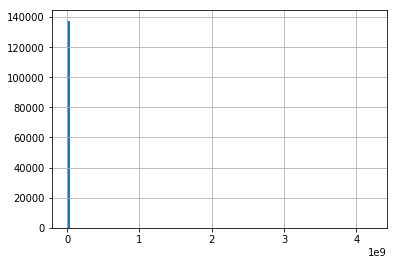

In [47]:
dfcars.price.hist(bins=100)

In [48]:
dfcars.to_pickle("dfcars.p")